In [12]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, GRU, Bidirectional
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

In [13]:
# Set random seed for reproducibility
np.random.seed(42)

In [14]:
# Step 1: Load the IMDB Dataset
max_features = 10000  # Use the top 10,000 most frequent words
max_len = 200         # Pad or truncate reviews to 200 words

In [15]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

In [16]:
# Step 2: Preprocess the Data
x_train = pad_sequences(x_train, maxlen=max_len)  # Pad training data
x_test = pad_sequences(x_test, maxlen=max_len)    # Pad test data

In [17]:
# Split the training data further into training and validation sets
x_train_partial, x_val, y_train_partial, y_val = train_test_split(
    x_train, y_train, test_size=0.2, random_state=42)

In [18]:
# Step 3: Define the RNN Model
model = Sequential([
    Embedding(input_dim=max_features, output_dim=128, input_length=max_len, name="Embedding_Layer"),
    Bidirectional(LSTM(128, return_sequences=False, name="LSTM_Layer")),  # Bidirectional LSTM for better context
    Dropout(0.5, name="Dropout_Layer_1"),  # Regularization
    Dense(64, activation='relu', name="Fully_Connected_Layer"),  # Fully connected layer
    Dropout(0.5, name="Dropout_Layer_2"),  # Regularization
    Dense(1, activation='sigmoid', name="Output_Layer")  # Output layer for binary classification
])

c:\Users\saurav\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [19]:
# Print model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Embedding_Layer (Embedding)     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_Layer_1 (Dropout)       │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Fully_Connected_Layer (Dense)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_Layer_2 (Dropout)       │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [20]:
# Step 4: Compile the Model
model.compile(
    optimizer='adam',  # Adaptive Moment Estimation optimizer
    loss='binary_crossentropy',  # Binary cross-entropy loss for binary classification
    metrics=['accuracy']  # Accuracy as the evaluation metric
)

In [21]:
# Step 5: Train the Model with Early Stopping
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=3,          # Stop training if no improvement for 3 epochs
    restore_best_weights=True  # Restore the weights of the best epoch
)

In [22]:
history = model.fit(
    x_train_partial, y_train_partial,  # Training data
    validation_data=(x_val, y_val),    # Validation data
    epochs=10,                         # Maximum number of epochs
    batch_size=32,                     # Number of samples per batch
    callbacks=[early_stopping]         # Use early stopping
)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 78ms/step - accuracy: 0.6575 - loss: 0.5853 - val_accuracy: 0.8164 - val_loss: 0.4218
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 77ms/step - accuracy: 0.8722 - loss: 0.3220 - val_accuracy: 0.8710 - val_loss: 0.3087
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 75ms/step - accuracy: 0.9295 - loss: 0.1958 - val_accuracy: 0.8440 - val_loss: 0.3729
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 75ms/step - accuracy: 0.9508 - loss: 0.1464 - val_accuracy: 0.8644 - val_loss: 0.4562
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 76ms/step - accuracy: 0.9704 - loss: 0.0893 - val_accuracy: 0.8544 - val_loss: 0.4880


In [23]:
# Step 6: Evaluate the Model on Test Data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.8689 - loss: 0.3178
Test Loss: 0.3159, Test Accuracy: 0.8686


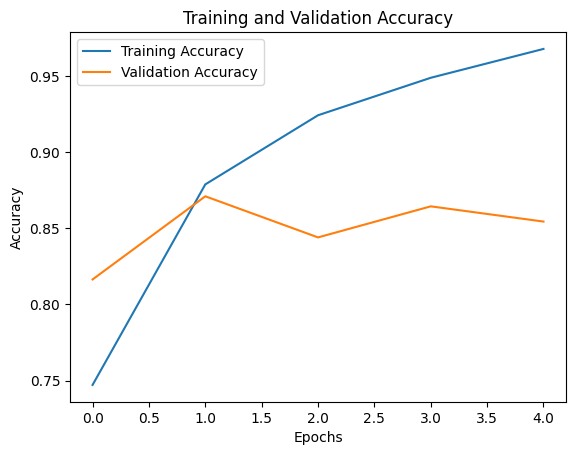

In [24]:
# Step 7: Visualize Training Performance
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

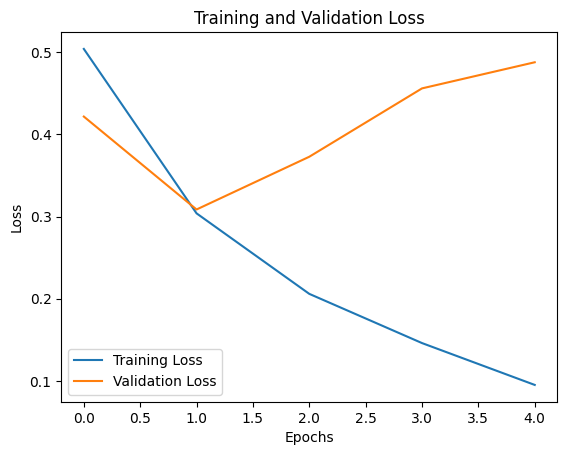

In [25]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [26]:
# Step 8: Compare with a Feedforward Neural Network
# Flatten the input for FFN
from tensorflow.keras.layers import Flatten

model_ffn = Sequential([
    Embedding(input_dim=max_features, output_dim=128, input_length=max_len, name="Embedding_Layer_FFN"),
    Flatten(name="Flatten_Layer"),  # Flatten the input for FFN
    Dense(128, activation='relu', name="Hidden_Layer_1_FFN"),
    Dropout(0.5, name="Dropout_Layer_FFN"),
    Dense(1, activation='sigmoid', name="Output_Layer_FFN")
])

In [27]:
# Compile the FFN model
model_ffn.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [28]:
# Train the FFN model
history_ffn = model_ffn.fit(
    x_train_partial, y_train_partial,
    validation_data=(x_val, y_val),
    epochs=10,
    batch_size=32,
    callbacks=[early_stopping]
)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 32ms/step - accuracy: 0.6990 - loss: 0.5310 - val_accuracy: 0.8638 - val_loss: 0.3247
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.9750 - loss: 0.0788 - val_accuracy: 0.8442 - val_loss: 0.4536
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.9984 - loss: 0.0102 - val_accuracy: 0.8552 - val_loss: 0.5671


In [29]:
# Evaluate the FFN model
test_loss_ffn, test_accuracy_ffn = model_ffn.evaluate(x_test, y_test)
print(f"FFN Test Loss: {test_loss_ffn:.4f}, Test Accuracy: {test_accuracy_ffn:.4f}")


782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8540 - loss: 0.3434
FFN Test Loss: 0.3352, Test Accuracy: 0.8563


In [30]:
# Step 9: Compare Performance
print("Comparison of RNN and FFN:")
print(f"RNN Test Accuracy: {test_accuracy:.4f}")
print(f"FFN Test Accuracy: {test_accuracy_ffn:.4f}")

Comparison of RNN and FFN:
RNN Test Accuracy: 0.8686
FFN Test Accuracy: 0.8563


In [31]:
# Step 10: Summarize Findings
if test_accuracy > test_accuracy_ffn:
    print("RNN performs better than FFN for this sentiment analysis task.")
else:
    print("FFN performs better than RNN for this sentiment analysis task.")

RNN performs better than FFN for this sentiment analysis task.
